#El Rapido

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from econometron.utils.data_preparation import TransformTS
from econometron.Models.VectorAutoReg import VAR

In [2]:
GDP=pd.read_csv("../../Data_Fred/gdp.csv", index_col=0, parse_dates=True)
Inflation=pd.read_csv("../../Data_Fred/inflation.csv", index_col=0, parse_dates=True)
Interest_Rate=pd.read_csv("../../Data_Fred/int_rate.csv", index_col=0, parse_dates=True)

In [3]:
mac_data=pd.concat([GDP, Inflation, Interest_Rate], axis=1).dropna()


=== Time Series Analysis ===

Stationarity Check (ADF Test):
Column GDP: Stationary, p-value: 0.0000, ADF Statistic: -4.9856
Column DPCCRV1Q225SBEA: Stationary, p-value: 0.0276, ADF Statistic: -3.0857
Column DFF: Stationary, p-value: 0.0000, ADF Statistic: -5.6126

Summary Statistics:
               GDP  DPCCRV1Q225SBEA         DFF
count   140.000000     1.410000e+02  140.000000
mean    172.066757     2.834612e-16   -0.026000
std     261.390203     1.116470e+00    0.719533
min   -1792.213000    -2.962411e+00   -2.720000
25%      96.405500    -6.624113e-01   -0.170000
50%     151.305500    -2.624113e-01    0.000000
75%     222.718000     4.375887e-01    0.242500
max    1749.107000     3.937589e+00    2.270000

NaN Counts:
GDP                1
DPCCRV1Q225SBEA    0
DFF                1
dtype: int64

Correlation Matrix:
                      GDP  DPCCRV1Q225SBEA       DFF
GDP              1.000000         0.500033  0.261576
DPCCRV1Q225SBEA  0.500033         1.000000  0.169277
DFF         

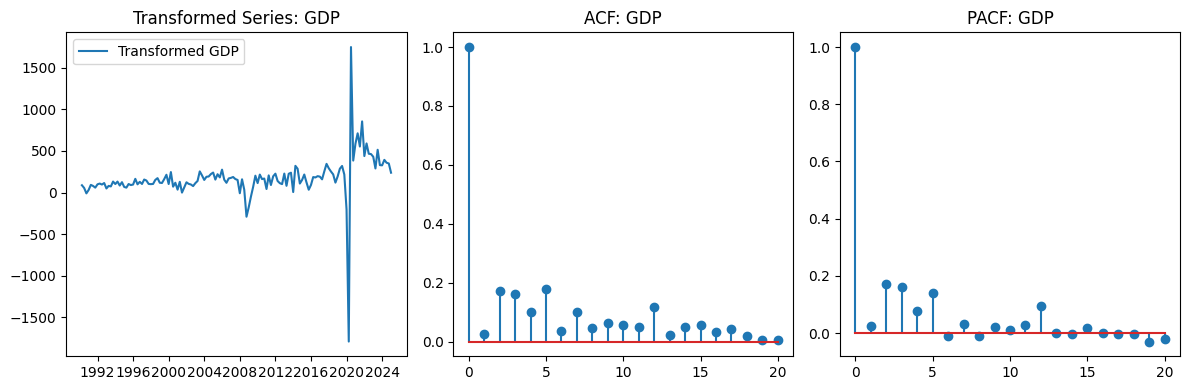

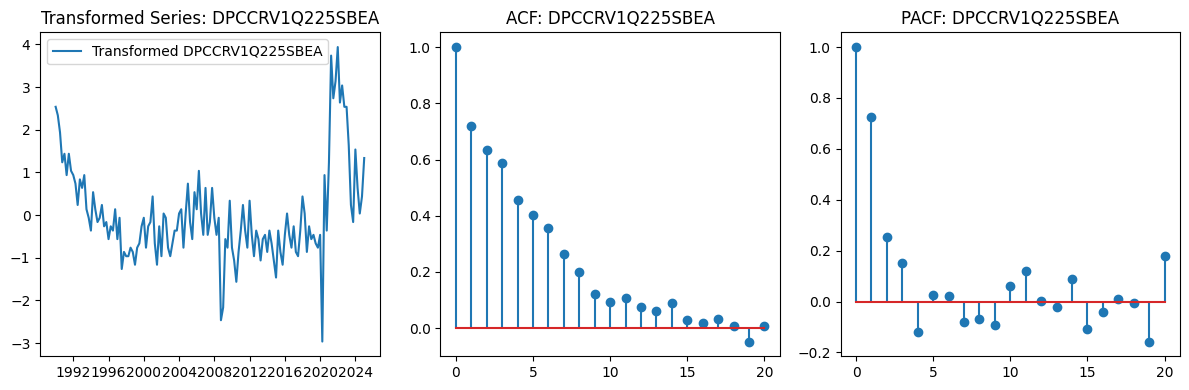

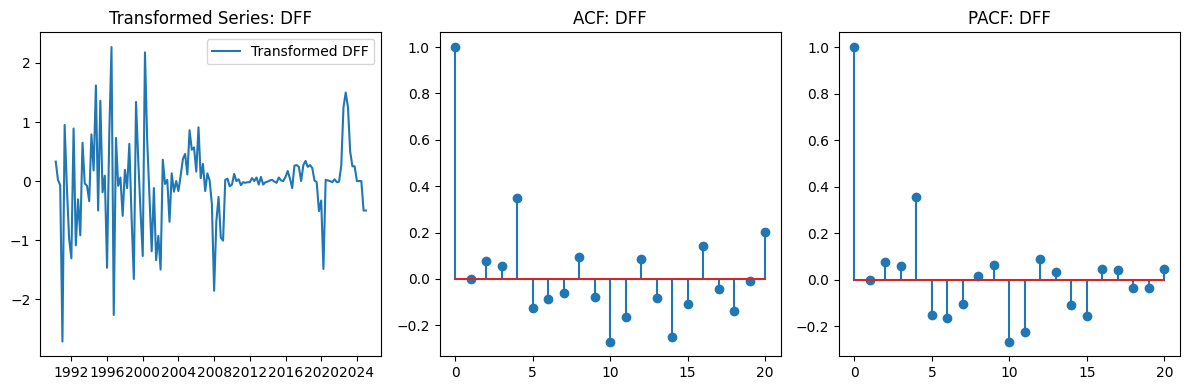

In [4]:
TSP=TransformTS(mac_data,method='diff',analysis=True,plot=True)

In [5]:
data=TSP.get_transformed_data()

In [6]:
data

,GDP,DPCCRV1Q225SBEA,DFF
observation_date,,,
1990-04-01,87.327,2.337589,0.33
1990-07-01,55.088,1.937589,0.02
1990-10-01,-10.383,1.237589,-0.07
1991-01-01,30.445,1.437589,-2.72
1991-04-01,91.684,0.937589,0.95
...,...,...,...
2024-01-01,327.102,1.537589,0.00
2024-04-01,392.645,0.637589,0.00
2024-07-01,358.200,0.037589,0.00


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 140 entries, 1990-04-01 to 2025-01-01
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   GDP              140 non-null    float64
 1   DPCCRV1Q225SBEA  140 non-null    float64
 2   DFF              140 non-null    float64
dtypes: float64(3)
memory usage: 4.4 KB


<Axes: xlabel='observation_date'>

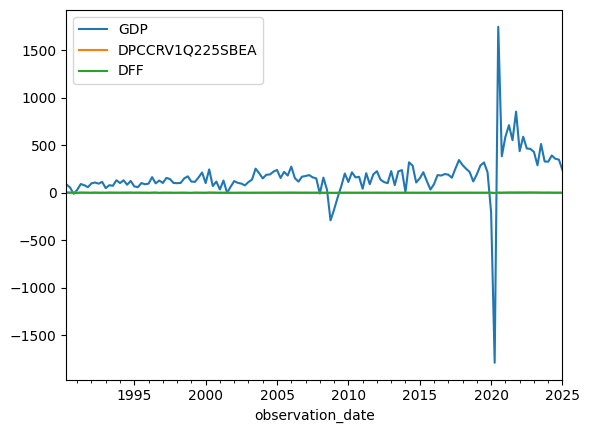

In [8]:
data.plot()

In [9]:
TSP.trns_info()

{'GDP': {'transformation_method': 'diff',
  'differencing_order': 1,
  'is_stationary': True,
  'p_value': 2.369131117511409e-05,
  'adf_statistic': -4.985648421451818,
  'is_log_transformed': False,
  'boxcox_lambda': None,
  'original_stationarity': True,
  'demeaned': True,
  'original_mean': 14681.494574468086,
  'details': 'Applied differencing 1 time(s) to achieve stationarity.'},
 'DPCCRV1Q225SBEA': {'transformation_method': 'diff',
  'differencing_order': 0,
  'is_stationary': True,
  'p_value': 0.027631303374830708,
  'adf_statistic': -3.0856792159654907,
  'is_log_transformed': False,
  'boxcox_lambda': None,
  'original_stationarity': True,
  'demeaned': True,
  'original_mean': 2.1624113475177302,
  'details': 'No differencing applied (series was already stationary).'},
 'DFF': {'transformation_method': 'diff',
  'differencing_order': 1,
  'is_stationary': True,
  'p_value': 1.1938199909620645e-06,
  'adf_statistic': -5.612639788063522,
  'is_log_transformed': False,
  'box

In [10]:
data.isna().sum()

GDP                0
DPCCRV1Q225SBEA    0
DFF                0
dtype: int64

In [11]:
vm=VAR(data,max_p=10,check_stationarity=True,plot=True)

C:\Users\ASUS\econometron\econometron\Models\VectorAutoReg\VAR.py:138: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  results = kpss(series.dropna(), regression='c', nlags='auto')
C:\Users\ASUS\econometron\econometron\Models\VectorAutoReg\VAR.py:138: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  results = kpss(series.dropna(), regression='c', nlags='auto')
C:\Users\ASUS\econometron\econometron\Models\VectorAutoReg\VAR.py:138: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  results = kpss(series.dropna(), regression='c', nlags='auto')


In [12]:
vm.order_select()

,p,aic,bic,hqic
0,4,9.367855,10.187312,9.700858
1,5,9.409163,10.417726,9.819013
2,6,9.476147,10.673816,9.962844
3,7,9.506115,10.892889,10.069658
4,1,9.514875,9.767016,9.617337
5,2,9.555721,9.996968,9.735031
6,3,9.573787,10.204139,9.829944
7,8,9.606017,11.181897,10.246407
8,9,9.687082,11.452067,10.404319
9,10,9.701056,11.655147,10.495140


Selecting only columns with numeric data
VAR(4) Coefficient Table

Constant Parameters:
------------------------------------------------------------------------------------------------------------------------
Variable       | GDP_coef     GDP_se     GDP_z    GDP_p   | DPCCRV1Q225SBEA_coef DPCCRV1Q225SBEA_se DPCCRV1Q225SBEA_z DPCCRV1Q225SBEA_p| DFF_coef     DFF_se     DFF_z    DFF_p   
------------------------------------------------------------------------------------------------------------------------
Constant       |   178.2480    49.0456   3.6343   0.0003|    -0.1428     0.1333  -1.0710   0.2842|    -0.0320     0.1232  -0.2600   0.7948

Lag 1 Parameters:
------------------------------------------------------------------------------------------------------------------------
Variable       | GDP_coef     GDP_se     GDP_z    GDP_p   | DPCCRV1Q225SBEA_coef DPCCRV1Q225SBEA_se DPCCRV1Q225SBEA_z DPCCRV1Q225SBEA_p| DFF_coef     DFF_se     DFF_z    DFF_p   
---------------------------------

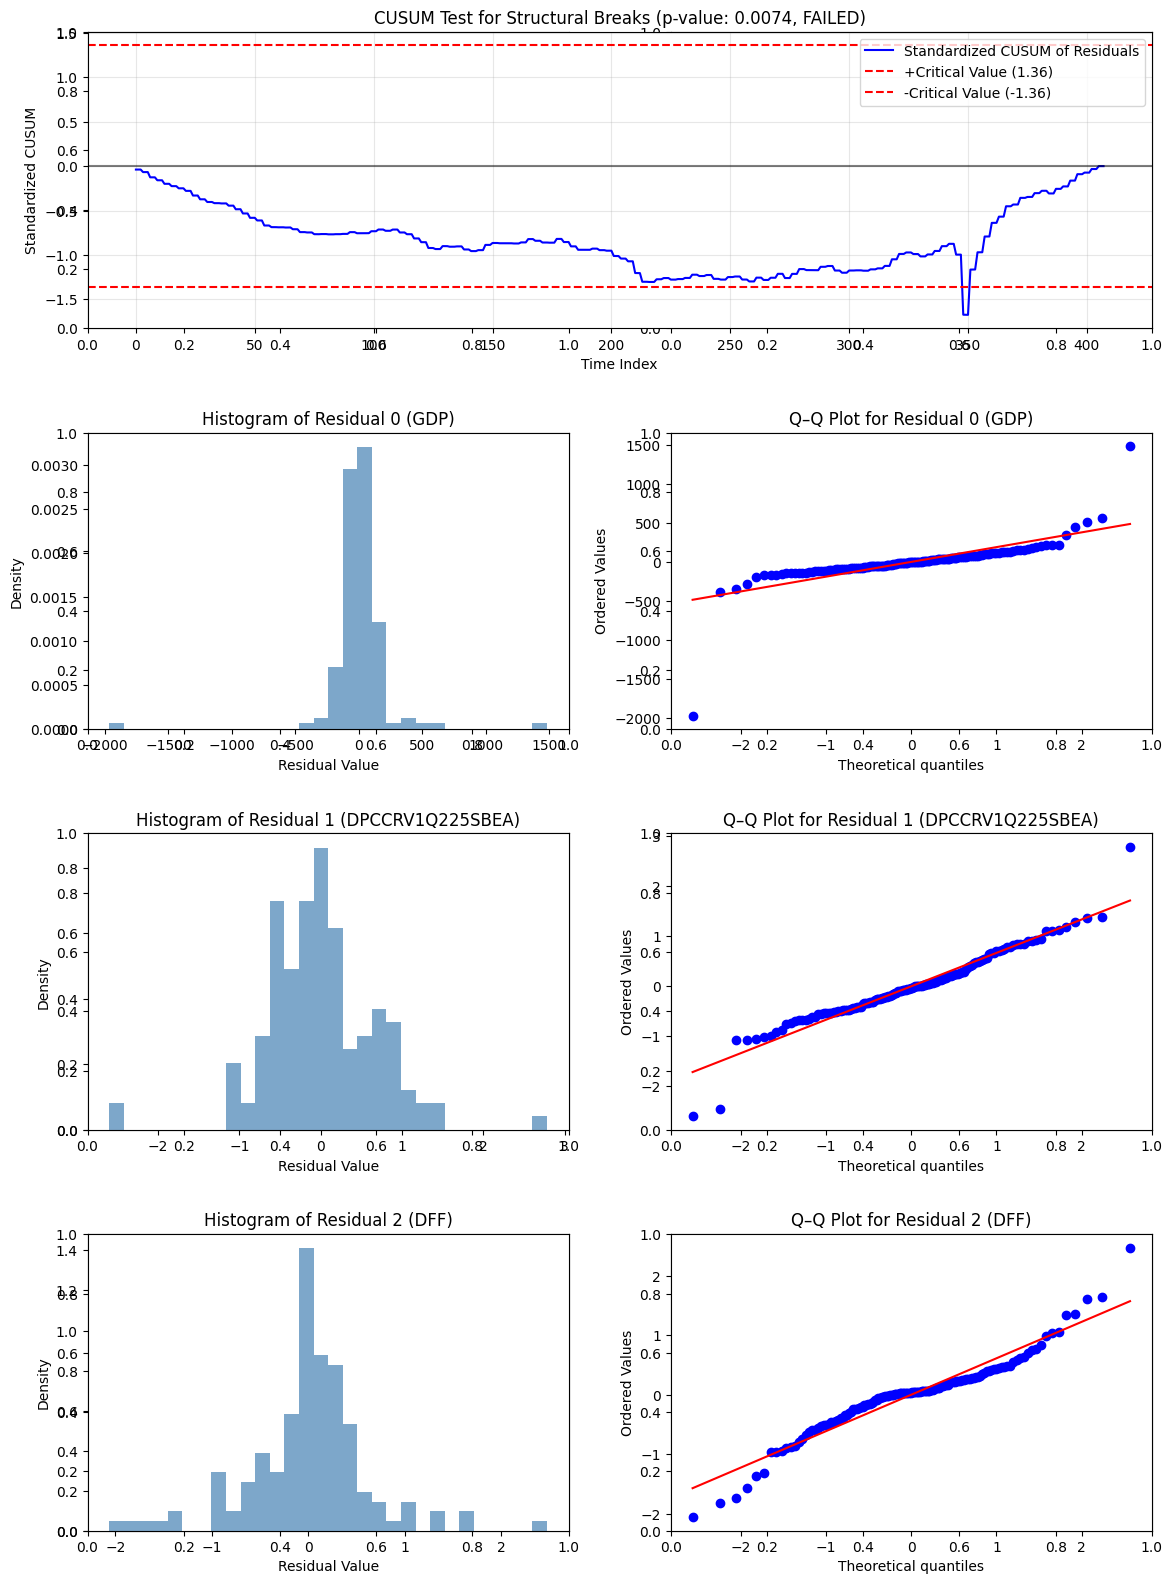

Plots are below


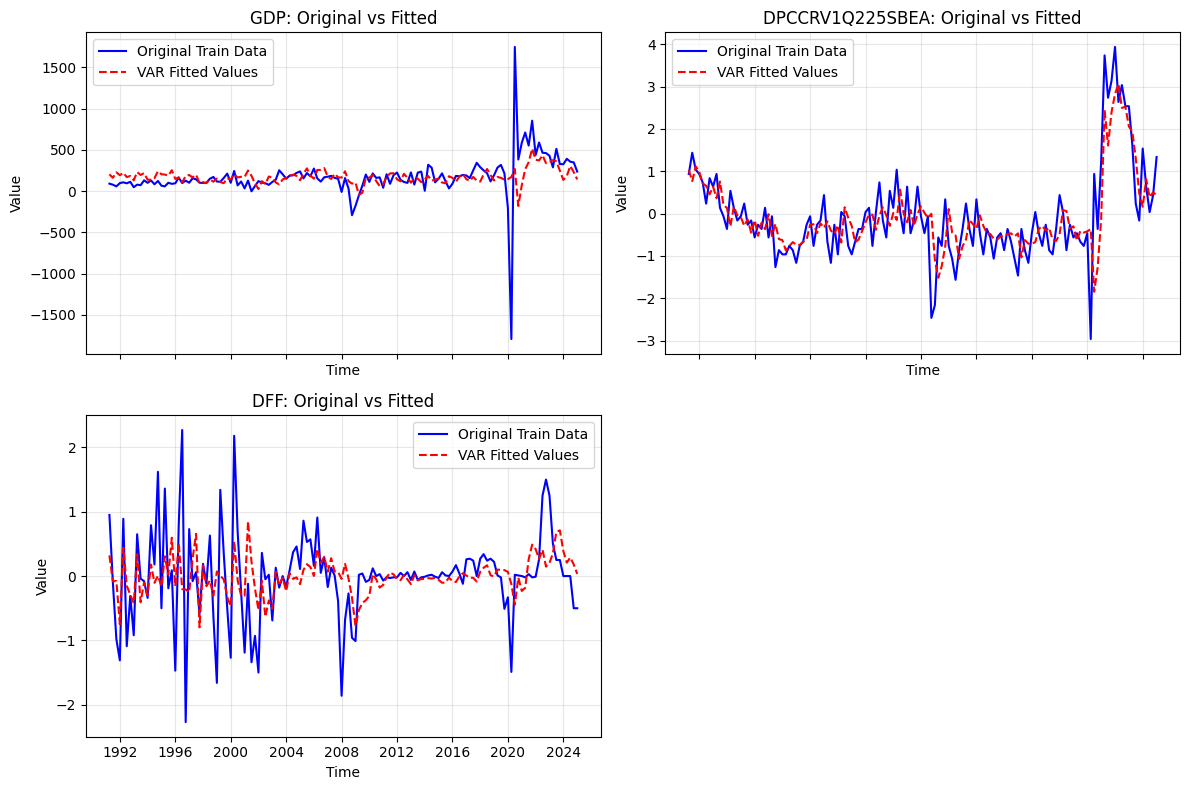

In [13]:
model_1=vm.fit()

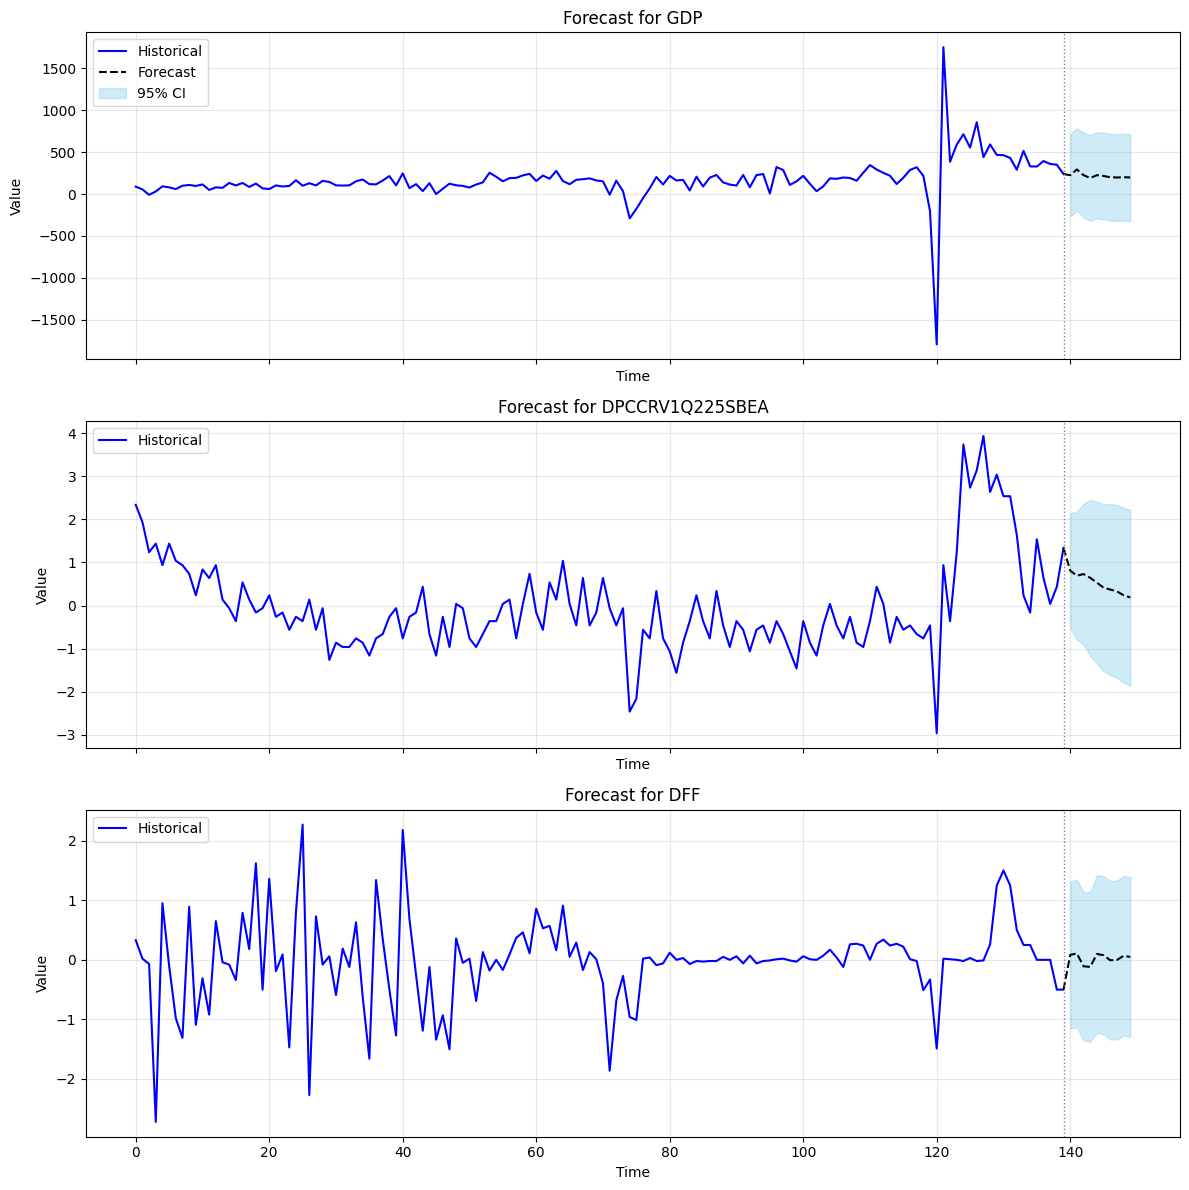

In [14]:
prediction=vm.predict(10)

In [15]:
prediction['point']

,GDP,DPCCRV1Q225SBEA,DFF
2025-01-02,224.115456,0.810644,0.083283
2025-01-03,292.261892,0.693092,0.106427
2025-01-04,224.234366,0.730116,-0.108348
2025-01-05,191.066965,0.642542,-0.118441
2025-01-06,224.645823,0.531617,0.098720
2025-01-07,214.663028,0.413432,0.077554
2025-01-08,199.725223,0.371455,-0.006901
2025-01-09,196.684540,0.328194,-0.001973
2025-01-10,200.201927,0.239007,0.067168
2025-01-11,197.246357,0.187688,0.049594


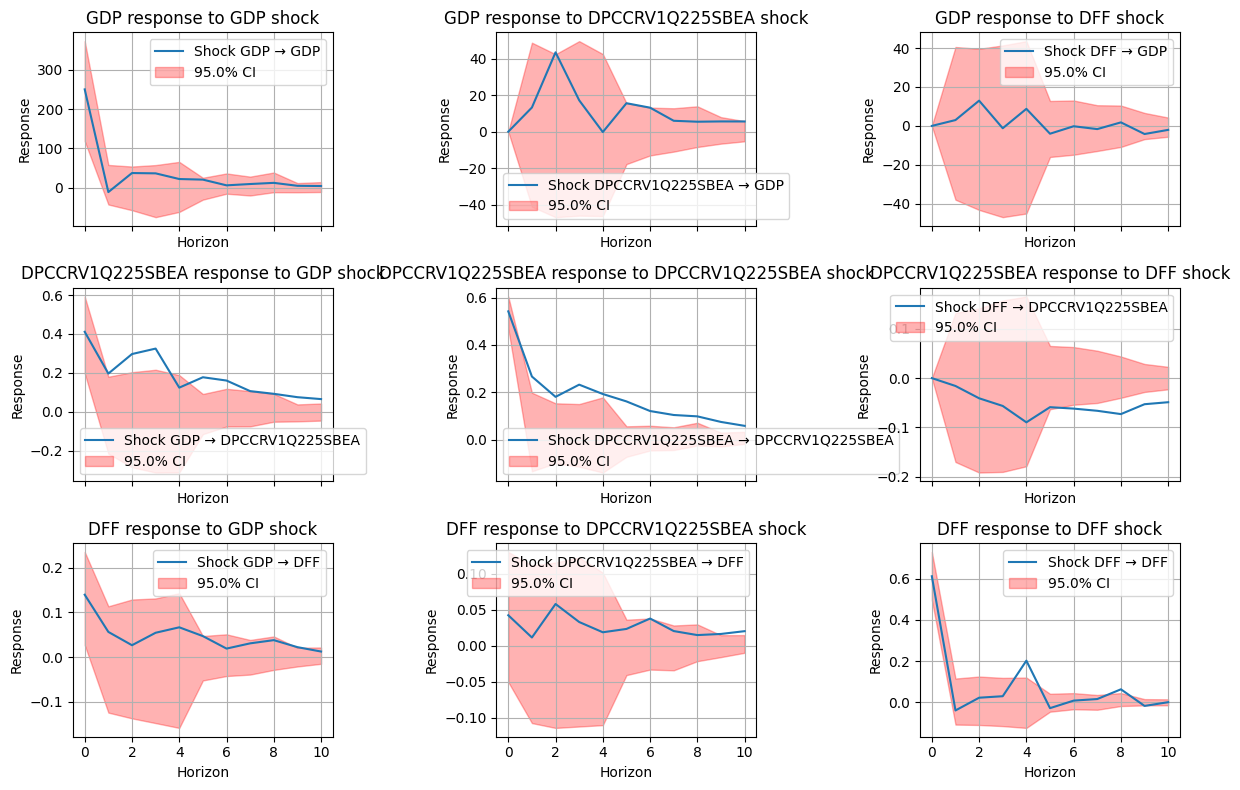

{'irf': array([[[ 2.50088129e+02,  0.00000000e+00,  0.00000000e+00],
         [ 4.10802717e-01,  5.41623751e-01,  0.00000000e+00],
         [ 1.39485667e-01,  4.24799827e-02,  6.11277871e-01]],
 
        [[-1.13998000e+01,  1.32205938e+01,  3.00080993e+00],
         [ 1.95962045e-01,  2.66670402e-01, -1.59200851e-02],
         [ 5.64168109e-02,  1.15645345e-02, -3.99005874e-02]],
 
        [[ 3.70893083e+01,  4.34128107e+01,  1.29680474e+01],
         [ 2.96433819e-01,  1.80938757e-01, -4.08635277e-02],
         [ 2.67256660e-02,  5.80982479e-02,  2.19317276e-02]],
 
        [[ 3.62861088e+01,  1.71748192e+01, -1.20051623e+00],
         [ 3.24525848e-01,  2.32403264e-01, -5.63910026e-02],
         [ 5.45490752e-02,  3.30837753e-02,  2.92090572e-02]],
 
        [[ 2.18420207e+01, -2.08950598e-01,  8.76379944e+00],
         [ 1.23631845e-01,  1.92900858e-01, -8.95561414e-02],
         [ 6.67106013e-02,  1.88252931e-02,  2.01669919e-01]],
 
        [[ 2.03215390e+01,  1.55705876e+01, -4.0

In [16]:
vm.impulse_res(plot=True,orth=True,bootstrap=True)

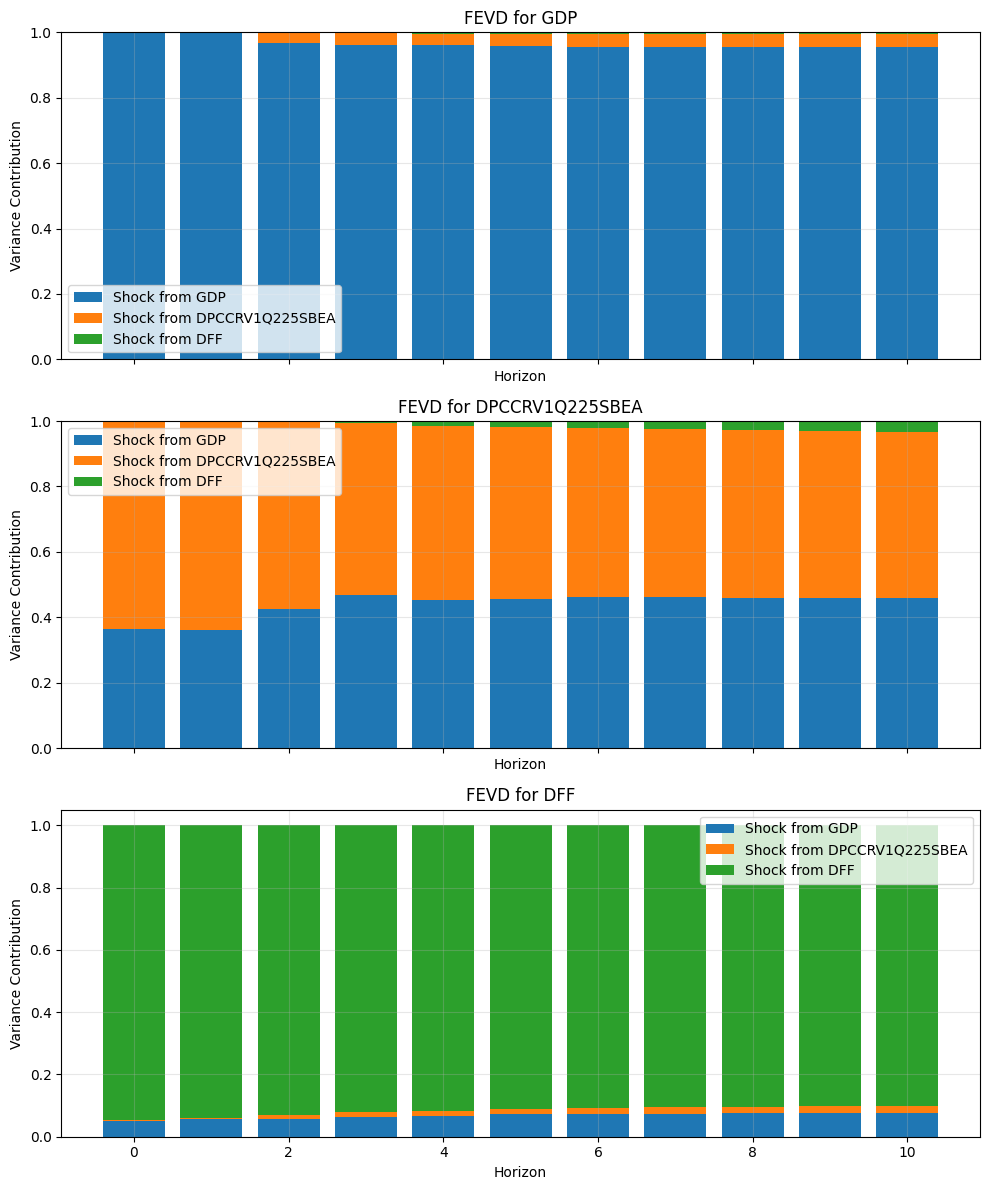

In [17]:
Fevd=vm.FEVD(10,plot=True)

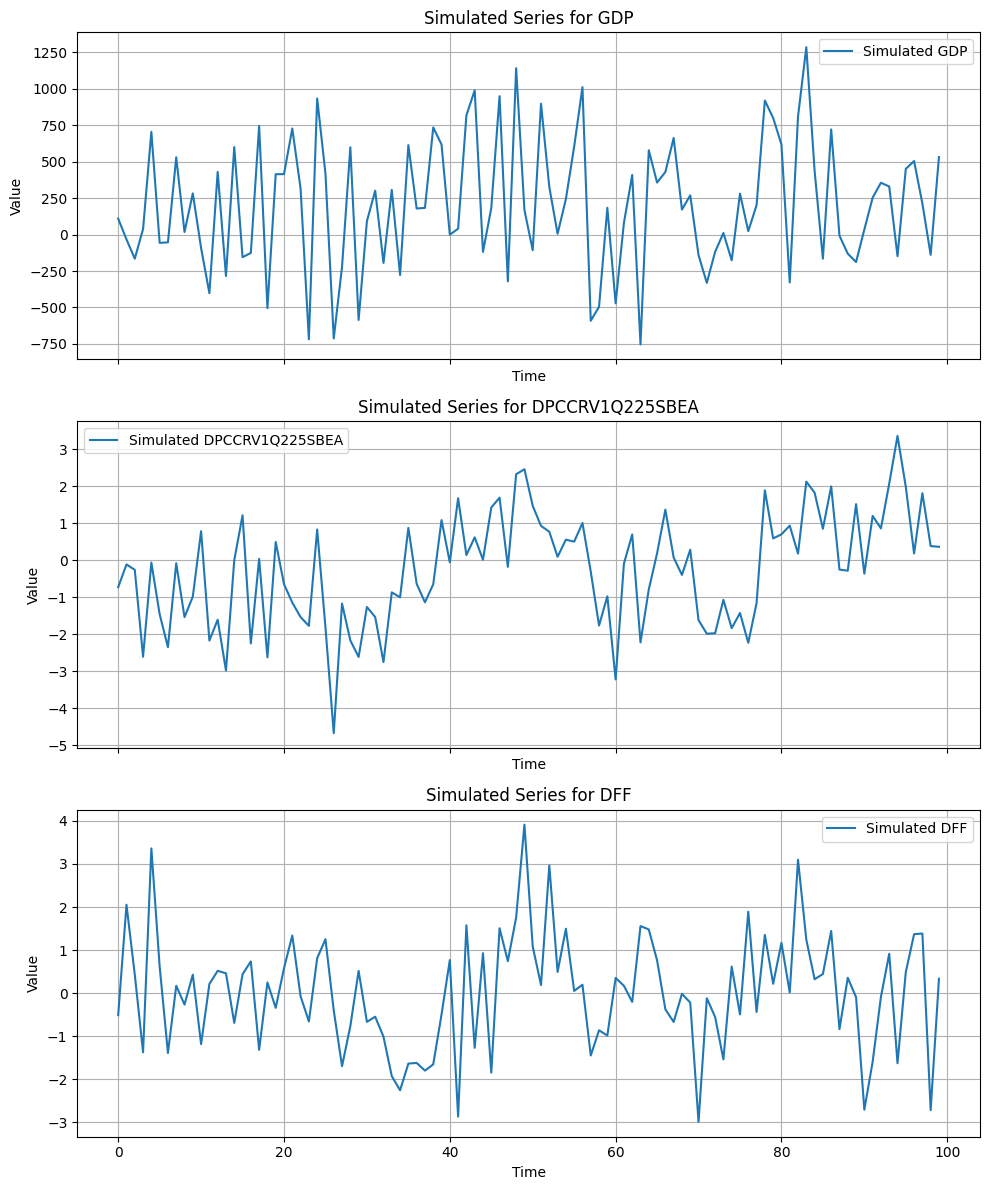

{'simulations': array([[ 1.09223234e+02, -7.30994411e-01, -5.09407771e-01],
        [-3.27270940e+01, -1.16053154e-01,  2.05273415e+00],
        [-1.65372050e+02, -2.63236683e-01,  4.32727342e-01],
        [ 3.78829029e+01, -2.61355729e+00, -1.37300204e+00],
        [ 7.04420846e+02, -6.53868506e-02,  3.36017916e+00],
        [-5.68881263e+01, -1.46192220e+00,  6.22651729e-01],
        [-5.35017258e+01, -2.35332632e+00, -1.38940305e+00],
        [ 5.29884266e+02, -8.43792036e-02,  1.70980838e-01],
        [ 1.75060007e+01, -1.54116862e+00, -2.64409520e-01],
        [ 2.82172039e+02, -9.87203582e-01,  4.29386642e-01],
        [-9.26710722e+01,  7.83465420e-01, -1.18308583e+00],
        [-4.02032939e+02, -2.17590732e+00,  2.12913066e-01],
        [ 4.29788243e+02, -1.61078063e+00,  5.18252741e-01],
        [-2.84050359e+02, -2.98390464e+00,  4.60679206e-01],
        [ 5.99848158e+02, -1.64309701e-03, -6.89506638e-01],
        [-1.55157803e+02,  1.21238914e+00,  4.38315996e-01],
        [

In [18]:
vm.simulate()